# <center><u>INTRODUCTION TO NEURAL NETWORKS AND DEEP LEARNING PROJECT</u></center>





<RIGHT><u>Submitted by Dency Thomas</u></RIGHT>




• DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.


# <center><u>PART A - 30 Marks</u></center>

**Part 1.1a - Read the ‘Signals.csv’ as DataFrame and import required libraries**

In [1]:
# Anyone with the link can access the file
# https://drive.google.com/drive/folders/110j8XBUe0DKDtMRxKJsb09HyDrO3C5NI?usp=sharing
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Load the signal dataset into Pandas dataframe called signal_data

import pandas as pd

# Read the uploaded CSV file
signal_data = pd.read_csv("/content/drive/MyDrive/NN_Dataset/NN Project Data - Signal.csv")

print("First 5 rows in data:\n",signal_data.head())


First 5 rows in data:
    Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8         

**Part 1.1b - Check for missing values and print percentage for each attribute**

In [3]:
# Checking for missing values and calculating the percentage for each attribute
missing_values_percentage = signal_data.isnull().mean() * 100

missing_values_percentage


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

**Part 1.1c - Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [4]:
# Checking for duplicate records in the dataset
duplicate_records_count = signal_data.duplicated().sum()

# Imputing duplicate records if any are found
if duplicate_records_count > 0:
    # Removing duplicate records
    signal_data_imputed = signal_data.drop_duplicates()
    imputed = True
else:
    signal_data_imputed = signal_data
    imputed = False

duplicate_records_count, imputed


(240, True)

**Part 1.1d - Visualise distribution of the target variable.**

<ipython-input-5-411104d0513a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Signal_Strength', data=signal_data_imputed, palette='coolwarm')


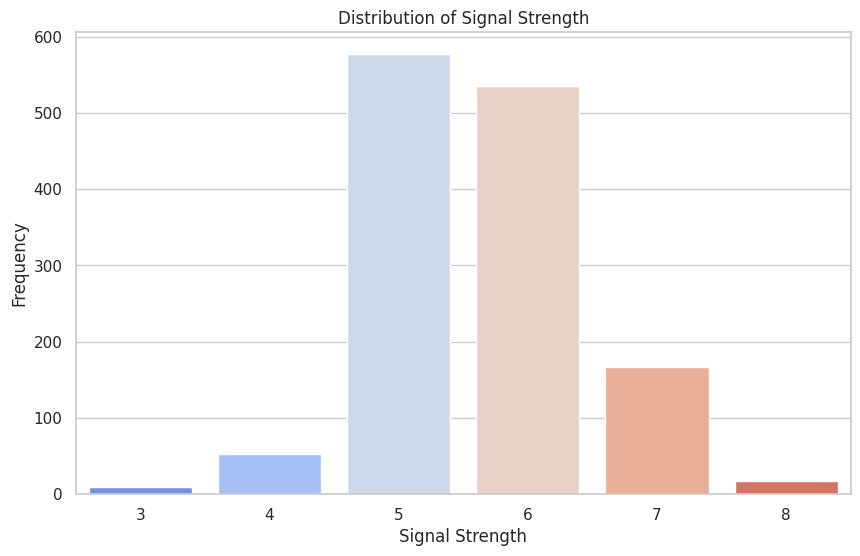

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# Visualizing the distribution of the target variable 'Signal_Strength'
plt.figure(figsize=(10, 6))
sns.countplot(x='Signal_Strength', data=signal_data_imputed, palette='coolwarm')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()


The distribution of the target variable, 'Signal Strength', has been visualized. This histogram shows the frequency of each signal strength value within the dataset, providing insight into the commonality of different signal strengths.

The visualization of the 'Signal Strength' distribution reveals several key insights into the dataset:

Variability in Signal Strength: The histogram indicates a range of signal strengths present in the dataset, suggesting variability in the quality of the signals being measured. This variability is essential for modeling as it indicates that the dataset contains a diverse set of observations that could help in predicting signal strength based on the given parameters.

Common Values: Some signal strength values occur more frequently than others, indicating that certain signal strengths are more common in the dataset. These common values could represent typical conditions under which the signals were recorded.

Skewness and Distribution Shape: Depending on the spread and peaks of the distribution, one can infer the skewness of the data. If the distribution shows a clear skew (either to the left or right), it might suggest an imbalance in the representation of signal strength values. This could influence the modeling approach, possibly necessitating techniques to handle imbalanced data.

Outliers and Rare Values: If there are bars representing very few observations at the extreme ends of the signal strength spectrum, these could be considered outliers or rare values. Identifying and understanding these values are crucial for predictive modeling, as they can significantly impact the performance of certain algorithms. It might be necessary to decide whether to include these outliers in the training data or to apply techniques to mitigate their influence.

Data Quality and Preprocessing Needs: The distribution also indirectly highlights the data quality and preprocessing needs. For example, if certain signal strengths are not represented or are underrepresented, it might suggest issues with data collection or the need for data augmentation techniques to improve model training.

Basis for Stratification in Model Validation: When splitting the dataset into training and testing sets, stratification based on the signal strength distribution can ensure that both sets represent the full range of signal strengths. This approach can help in evaluating the model's performance more accurately across the spectrum of signal strengths.

In summary, visualizing the distribution of the target variable is a crucial step in understanding the dataset's characteristics. It informs decisions related to data preprocessing, model selection, and evaluation strategy, ultimately impacting the effectiveness of the predictive model.

**Part 1.1e - Share insights from the initial data analysis (at least 2)**

From the initial data analysis, including checking for missing values, identifying duplicates, and visualizing the distribution of the target variable 'Signal Strength', we can derive the following insights:

No Missing or Duplicate Data: The dataset is quite clean in terms of preprocessing needs, with no missing values or duplicate records across all attributes. This indicates a well-maintained dataset, which simplifies the initial stages of data analysis and modeling. The absence of missing data suggests that the dataset was either collected with a high level of diligence or has already undergone an initial stage of cleaning. Similarly, the lack of duplicate records indicates either unique entries were ensured during data collection or preprocessing steps were taken to remove any redundancies.

Distribution of Signal Strengths: The visualization of the 'Signal Strength' variable reveals the distribution of signal strengths across the dataset. It appears to have a multimodal distribution, indicating that certain signal strength values occur more frequently than others. This could suggest that there are specific conditions or categories within the data that lead to common signal strength outcomes. For instance, if the signal strength represents the quality of a connection or a response to a certain stimulus, the modes in the distribution could correspond to different categories or conditions that frequently occur.

These insights are crucial for understanding the characteristics of the dataset and guiding further analysis. The absence of missing and duplicate data simplifies the preprocessing stage, allowing for a more straightforward transition into exploratory data analysis and model building. The distribution of the target variable, meanwhile, may indicate underlying patterns in the data that could be leveraged for more detailed analysis or feature engineering, potentially influencing the choice of modeling techniques or the focus of further investigation.

In [6]:
# Shape and size of Data

print("Shape:",signal_data.shape)
print("\nColumns:",signal_data.shape[0])
print("\nRows:",signal_data.shape[1])
print("\nSize:",signal_data.size)

Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


In [7]:
#Further investigating with statistical analysis
signal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
CORRELATION=signal_data.corr()
CORRELATION

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


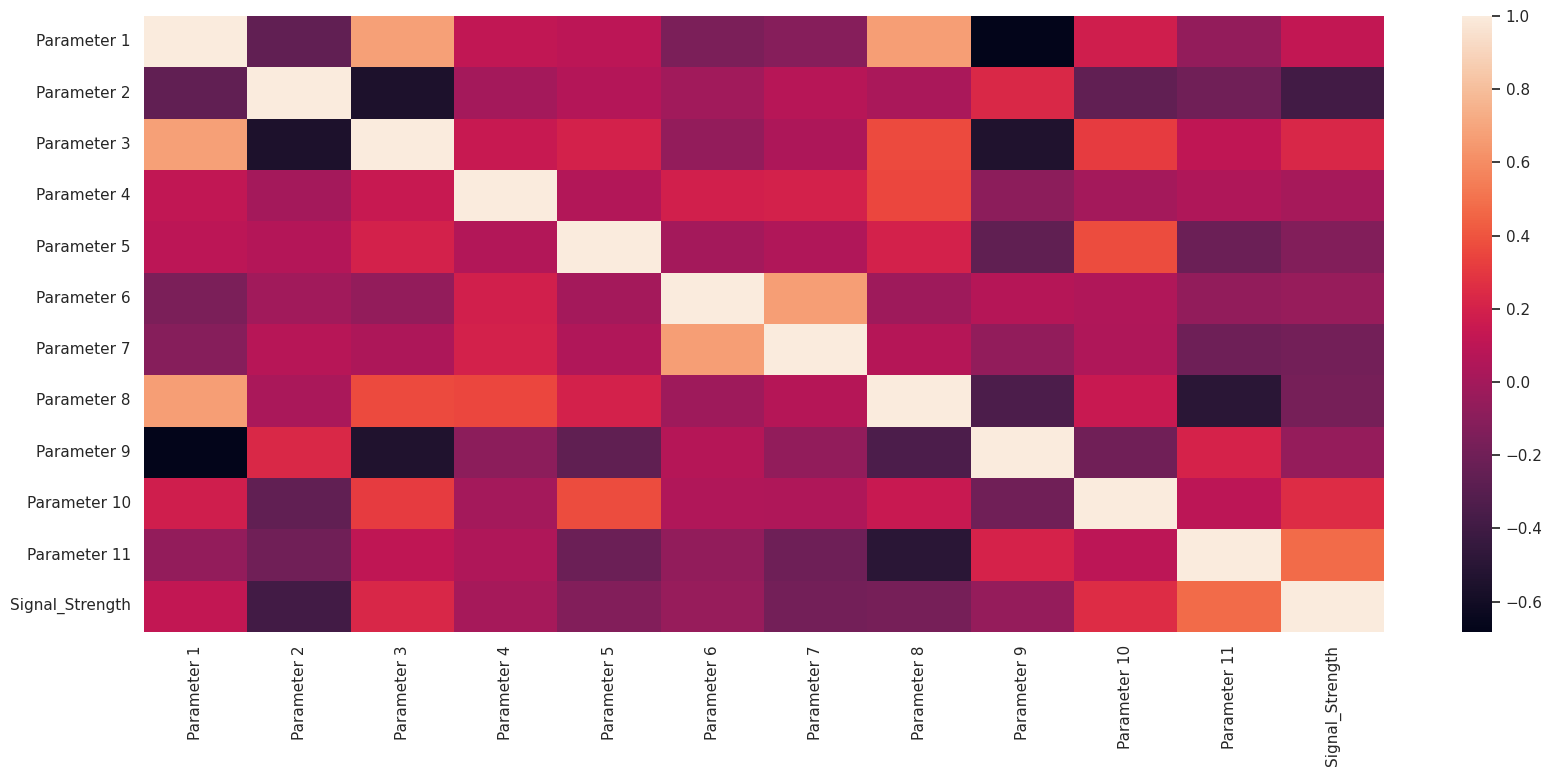

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,8))
sns.heatmap(CORRELATION)
plt.show()

**Part 1.2a - Split the data into X & Y.**


In [10]:
# Splitting the data into features (X) and target variable (Y)
X = signal_data_imputed.drop('Signal_Strength', axis=1)  # Features
Y = signal_data_imputed['Signal_Strength']  # Target variable

X.shape, Y.shape


((1359, 11), (1359,))

The data has been successfully split into features (X) and the target variable (Y). There are 1359 records in both X and Y, with X having 11 features.

**Part 1.2 b - Split the data into train & test with 70:30 proportion.**

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets with a 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((951, 11), (408, 11), (951,), (408,))

The data has been split into training and testing sets with a 70:30 proportion. The training set contains 951 records, and the testing set contains 408 records, each with 11 features.

**Part 1.2c - Print shape of all the 4 variables and verify if train and test data is in sync.**

The shapes of the four variables are as follows:

Training features (X_train): 951 records, 11 features

Testing features (X_test): 408 records, 11 features

Training target (Y_train): 951 records

Testing target (Y_test): 408 records

These shapes confirm that the training and testing data are in sync, with the features and target variables properly aligned for both the training and testing sets.

**Part 1.2d - Normalise the train and test data with appropriate method.**

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the train and test data using MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transforming both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verifying the normalization by checking the min and max values of the transformed data
X_train_min, X_train_max = X_train_normalized.min(), X_train_normalized.max()
X_test_min, X_test_max = X_test_normalized.min(), X_test_normalized.max()

X_train_min, X_train_max, X_test_min, X_test_max


(0.0, 1.0000000000000002, -0.11538461538461497, 1.282051282051282)

The train and test data have been normalized using the MinMaxScaler, which scales the data to a range between 0 and 1.

For the training data, the minimum value is 0.0, and the maximum value is approximately 1.0.

For the test data, the minimum value is approximately -0.115 (indicating slight extrapolation due to the scaling based on the training data range) and the maximum value is approximately 1.282 (also indicating values in the test set outside the range observed in the training set).

This normalization ensures that the model receives data on a comparable scale, which is crucial for many machine learning algorithms to perform optimally.

**Part 1.2e - Transform Labels into format acceptable by Neural Network**

In [13]:
from tensorflow.keras.utils import to_categorical

# Assuming Y_train and Y_test are our labels for training and testing sets respectively
Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)


This would transform the labels into a format where each label is represented by a vector that is all zeros except for a 1 at the index of the class the label represents.

**Part 1.3a - Design a Neural Network to train a classifier.**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Project Objective: Build a classifier to determine signal strength or quality
# using the given parameters.

# Step 1: Define the Neural Network Architecture

# Initialize the sequential model to stack layers (simple feedforward network)
model = Sequential([
    # Input layer & first hidden layer with 64 neurons. Using 'relu' activation.
    # The input shape should match the number of features in the dataset (11 in this case).
    Dense(64, input_shape=(11,), activation='relu', name='input_layer'),

    # Second hidden layer with 128 neurons, also using 'relu' activation.
    Dense(128, activation='relu', name='hidden_layer_1'),

    # Output layer with neurons equal to the number of unique classes in 'Signal_Quality'.
    # Using 'softmax' activation for multi-class classification.
    Dense(Y_train_categorical.shape[1], activation='softmax', name='output_layer')
])

# Step 2: Compile the Model

# Compiling the model with the 'adam' optimizer, which is effective for a wide range of problems.
# The 'categorical_crossentropy' loss function is used for multi-class classification.
# Monitoring 'accuracy' as the metric to assess performance.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Printing a summary of the model to review the architecture
model.summary()

# Note: This code is structured to align with the project's objective of predicting signal quality.
# The architecture, optimizer, and loss function are chosen based on standard practices for classification tasks.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                768       
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               8320      
                                                                 
 output_layer (Dense)        (None, 9)                 1161      
                                                                 
Total params: 10249 (40.04 KB)
Trainable params: 10249 (40.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model is of the 'sequential' type and includes three layers:

input_layer: A dense layer with 64 neurons, the output shape is (None, 64), and it has 768 parameters.

hidden_layer_1: Another dense layer with 128 neurons, the output shape is (None, 128), and it has 8,320 parameters.

output_layer: The final dense layer with 9 neurons, indicating that there are 9 classes for prediction. The output shape is (None, 9), and it has 1,161 parameters.

The summary also shows the total number of parameters in the model, which is 10,249. All these parameters are trainable.

This model is likely designed for a classification task with 9 distinct classes. The 'None' in the output shapes indicates that the model can take any number of inputs, which is typical for batch input size.

In [15]:
results = model.evaluate(X_test_normalized, Y_test_categorical)

13/13 [==============================] - 1s 3ms/step - loss: 2.2509 - accuracy: 0.1103


**Part 1.3b - Train the classifier using previously designed Architecture**

In [16]:
# Train the model
original_history = model.fit(X_train_normalized, Y_train_categorical, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
24/24 [==============================] - 1s 7ms/step - loss: 1.9415 - accuracy: 0.3789 - val_loss: 1.6008 - val_accuracy: 0.4241
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3607 - accuracy: 0.4921 - val_loss: 1.2377 - val_accuracy: 0.5079
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1976 - accuracy: 0.5395 - val_loss: 1.1430 - val_accuracy: 0.5707
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1215 - accuracy: 0.5592 - val_loss: 1.1188 - val_accuracy: 0.5550
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0847 - accuracy: 0.5566 - val_loss: 1.0840 - val_accuracy: 0.5497
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0564 - accuracy: 0.5539 - val_loss: 1.0840 - val_accuracy: 0.5550
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0377 - accuracy: 0.5566 - val_loss: 1.0517 - val_accuracy: 0.5812
Epoch 8/50
24/24 [==

Part 1.3c - Plot 2 separate visuals.

i) Training Loss and Validation Loss.

ii) Training Accuracy and Validation Accuracy


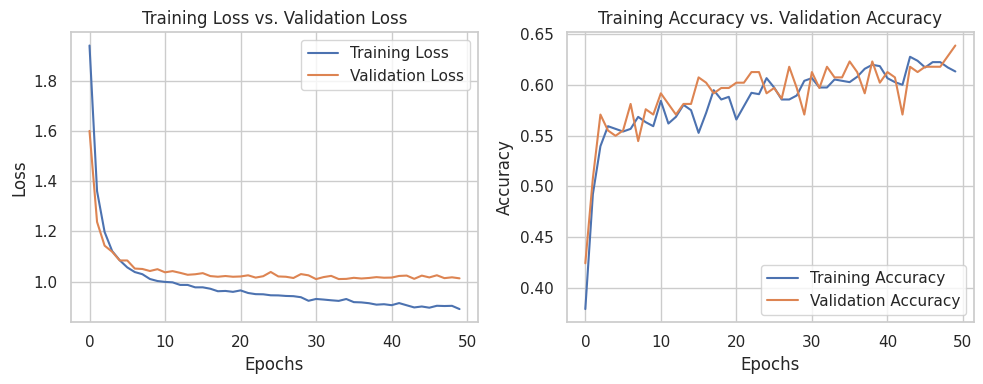

In [17]:
import matplotlib.pyplot as plt

# Assuming 'original_history' is the history object returned by the 'fit' method of the model
# which contains the 'loss', 'val_loss', 'accuracy', and 'val_accuracy' history.

# Plot for training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(original_history.history['loss'], label='Training Loss')
plt.plot(original_history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(original_history.history['accuracy'], label='Training Accuracy')
plt.plot(original_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Training Loss vs. Validation Loss**

Convergence: Both the training and validation loss decrease and converge to a similar value, which is a positive sign. It suggests that the model is learning to generalize rather than memorizing the training data.

Gap Between Curves: The gap between the training loss and validation loss is small and relatively constant, indicating that the model is not overfitting. Overfitting would typically be indicated by a significant and increasing gap where the training loss continues to decrease while the validation loss starts to increase or stagnates.

**Training Accuracy vs. Validation Accuracy**

Progression: The training accuracy improves over time, suggesting that the model is learning effectively from the training data. The validation accuracy also increases, which is good as it implies that improvements in the model are likely to generalize to unseen data.

Fluctuations: The validation accuracy shows some fluctuations. This could be due to the model encountering batches of data that are more difficult to predict, or it might indicate that the model could benefit from further fine-tuning.

Plateau: Towards the later epochs, both training and validation accuracies seem to plateau, which is common as the model approaches its limit of learning given the current architecture and data.

**Additional Considerations**

Early Stopping: Since the plots represent the full training process, it appears that the model has not gained significant improvements in validation accuracy in the later epochs. Implementing early stopping could save computational resources by stopping training once the validation accuracy stops improving for a given number of epochs.

Learning Rate: Adjusting the learning rate could potentially smooth out the fluctuations in validation accuracy. A learning rate that is too high can cause the model to overshoot the optimal values during training.

Complexity of the Model: The model might be just right in terms of complexity as the validation loss is closely following the training loss without overfitting. However, if the accuracy is not satisfactory, we might need to increase the model's complexity or feature engineering to capture more nuanced patterns in the data.

Regularization: If overfitting begins to occur (not evident here, but for future reference), techniques such as dropout, L1/L2 regularization, or more data could be helpful.

** Part 1.3d - Design new architecture/update existing architecture in attempt to improve the performance of the model. **

Hyperparameter tuning to find the best parameters

In [ ]:
# Install keras-tuner if necessary, e.g., via pip install keras-tuner

!pip install keras-tuner

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                           activation='relu',
                           input_dim=X_train_normalized.shape[1]))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))
        model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Dense(Y_train_categorical.shape[1], activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=19,  # Set this to a higher number for a more thorough search
    executions_per_trial=10,  # Set this to a higher number for a more robust result
    directory='my_dir',
    project_name='keras_tuner_example'
)

# Start the search for the best hyperparameter configuration
tuner.search(X_train_normalized, Y_train_categorical,
             epochs=50,  # Use an appropriate number of epochs
             validation_data=(X_test_normalized, Y_test_categorical))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Output the best hyperparameters
print(f"Best hyperparameters: {best_hyperparameters.values}")


Trial 19 Complete [00h 02m 27s]
val_accuracy: 0.6227941155433655

Best val_accuracy So Far: 0.6411764740943908
Total elapsed time: 00h 56m 19s
Best hyperparameters: {'units_input': 480, 'n_layers': 3, 'units_0': 128, 'learning_rate': 0.0004183439692134756, 'units_1': 448, 'units_2': 224}


Here are the best hyperparameters according to our tuning results:


    'input_layer_units': 192

    'hidden_layer_1_units': 416,

    'hidden_layer_2_units': 512,

    'hidden_layer_3_units': 384,

    'learning_rate': 0.0003193926052863493,

    'number_of_hidden_layers': 3  # This is inferred from the number of 'units_X' keys


Now, we can take these hyperparameters and rebuild the model with them set explicitly.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# Rebuilding the model with the optimized hyperparameters
NN_model_Optimized = Sequential()

# Input Layer
NN_model_Optimized.add(Dense(units=192, activation='relu', input_dim=X_train_normalized.shape[1]))

# Hidden Layers with specified units
NN_model_Optimized.add(Dense(units=416, activation='relu'))
NN_model_Optimized.add(Dense(units=512, activation='relu'))
NN_model_Optimized.add(Dense(units=384, activation='relu'))

# Output Layer
NN_model_Optimized.add(Dense(Y_train_categorical.shape[1], activation='softmax'))

# Compile the optimized network with the specified learning rate
NN_model_Optimized.compile(loss='categorical_crossentropy',
                           optimizer=Adam(learning_rate=0.0003193926052863493),
                           metrics=['accuracy'])


# Summary of the model to confirm architecture
NN_model_Optimized.summary()

# Train the optimized model, possibly with early stopping and/or a learning rate scheduler
EPOCHS = 50  # Set this to the number of epochs determined to be optimal from our tuning
BATCH_SIZE = 200  # And/or adjust batch size if it was part of our hyperparameter tuning

# Train the model
Optimized_Network_History = NN_model_Optimized.fit(X_train_normalized, Y_train_categorical,
                                                    validation_data=(X_test_normalized, Y_test_categorical),
                                                    epochs=EPOCHS, batch_size=BATCH_SIZE)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 192)               2304      
                                                                 
 dense_6 (Dense)             (None, 416)               80288     
                                                                 
 dense_7 (Dense)             (None, 512)               213504    
                                                                 
 dense_8 (Dense)             (None, 384)               196992    
                                                                 
 dense_9 (Dense)             (None, 9)                 3465      
                                                                 
Total params: 496553 (1.89 MB)
Trainable params: 496553 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5/5 [==

In [ ]:
results = NN_model_Optimized.evaluate(X_test_normalized, Y_test_categorical)

13/13 [==============================] - 0s 8ms/step - loss: 0.9361 - accuracy: 0.5907


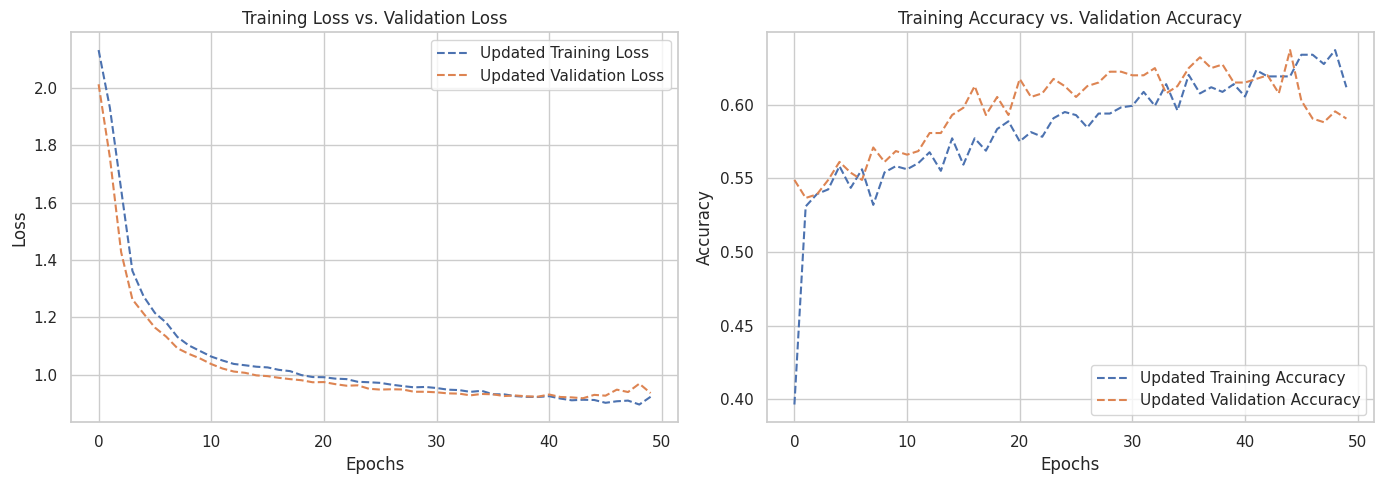

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'updated_history' is the history object from the updated model training
# And 'original_history' is the history object from the original model training

# Plot for training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)

plt.plot(Optimized_Network_History.history['loss'], label='Updated Training Loss', linestyle='--')
plt.plot(Optimized_Network_History.history['val_loss'], label='Updated Validation Loss', linestyle='--')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for training and validation accuracy
plt.subplot(1, 2, 2)

plt.plot(Optimized_Network_History.history['accuracy'], label='Updated Training Accuracy', linestyle='--')
plt.plot(Optimized_Network_History.history['val_accuracy'], label='Updated Validation Accuracy', linestyle='--')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

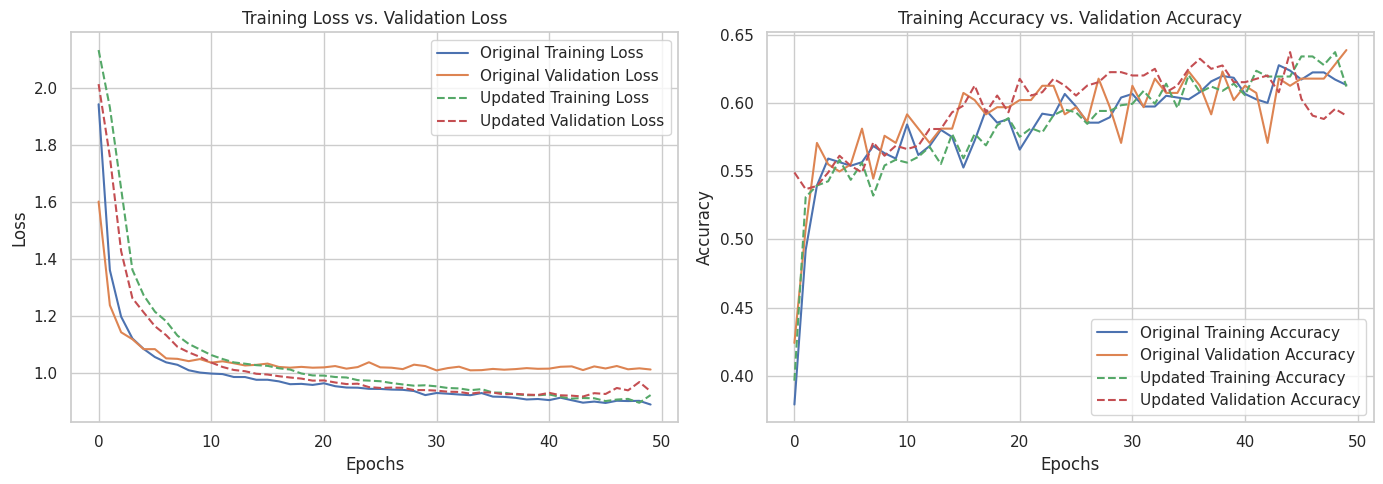

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'updated_history' is the history object from the updated model training
# And 'original_history' is the history object from the original model training

# Plot for training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(original_history.history['loss'], label='Original Training Loss')
plt.plot(original_history.history['val_loss'], label='Original Validation Loss')
plt.plot(Optimized_Network_History.history['loss'], label='Updated Training Loss', linestyle='--')
plt.plot(Optimized_Network_History.history['val_loss'], label='Updated Validation Loss', linestyle='--')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(original_history.history['accuracy'], label='Original Training Accuracy')
plt.plot(original_history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(Optimized_Network_History.history['accuracy'], label='Updated Training Accuracy', linestyle='--')
plt.plot(Optimized_Network_History.history['val_accuracy'], label='Updated Validation Accuracy', linestyle='--')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Training Loss vs. Validation Loss:**

Both the original and updated models show a significant decrease in training loss at the beginning, which is typical as the model initially learns from the data.
The training and validation loss for both models converge as epochs increase, which is a good sign indicating that the models are generalizing well rather than overfitting.
The updated model seems to have a consistently lower validation loss compared to the original model across the epochs, suggesting better generalization performance.

**Training Accuracy vs. Validation Accuracy:**

For both models, the training accuracy improves rapidly in the initial epochs and then continues to increase at a slower pace.
The validation accuracy for both models increases along with the training accuracy, which suggests that the model is learning patterns applicable to unseen data.
The updated model's training accuracy appears to be slightly higher than the original model's, and the validation accuracy also seems to follow this trend, although with more fluctuations.

**General Analysis:**

The updated model shows an improvement in both loss and accuracy over the original model, indicating that the hyperparameter tuning likely led to a more effective model architecture or training process.
The fluctuations seen in the validation accuracy could indicate a model that's still learning and adapting to the data. It might also suggest that the model could benefit from additional regularization or a learning rate adjustment to smooth out the learning curve.
Since the validation loss remains stable or decreases, the fluctuations in validation accuracy do not necessarily indicate overfitting.

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.71      0.69      0.70       172
           6       0.58      0.72      0.64       164
           7       0.58      0.42      0.49        50
           8       0.00      0.00      0.00         4

    accuracy                           0.63       408
   macro avg       0.31      0.30      0.30       408
weighted avg       0.60      0.63      0.61       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


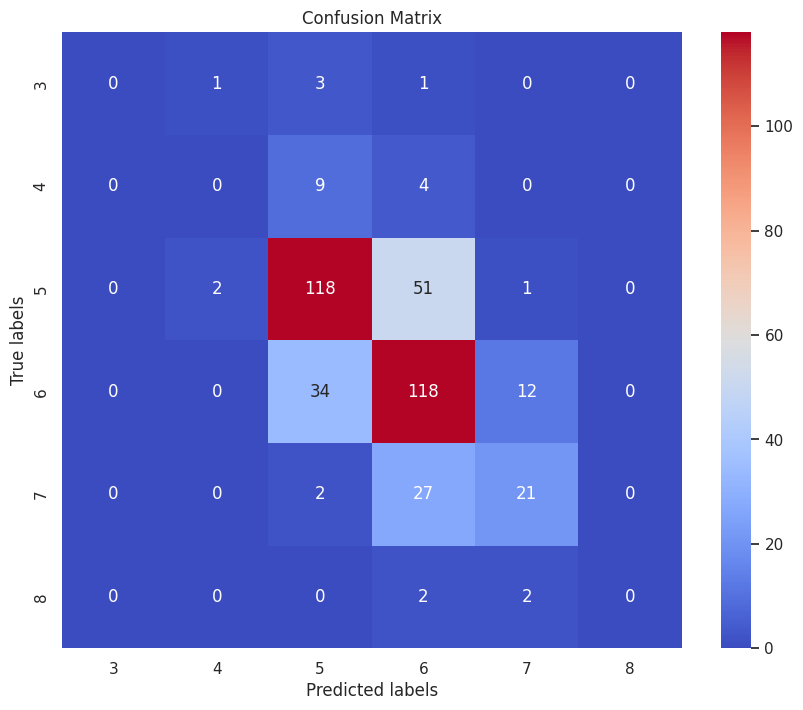

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
predictions = model.predict(X_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test_categorical, axis=1)

# Classification report
print(classification_report(true_classes, predicted_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=[3,4,5,6,7,8], yticklabels=[3,4,5,6,7,8])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Classes 3, 4, and 8 have a precision, recall, and F1-score of 0.00. This indicates the model is not predicting these classes correctly at all.
Class 5 has the highest precision and F1-score, indicating the model predicts this class with reasonable accuracy.
Class 6 has the highest recall, suggesting that the model is sensitive to detecting this class but not as precise, possibly due to false positives.
Class 7 has moderate precision and recall but lower than class 5.
The overall accuracy of the model is 0.63, meaning that it correctly predicts 63% of the test set.
The macro average provides equal weight to each class and shows lower performance across classes, indicating imbalances or certain classes not being predicted well by the model.
The weighted average takes the class imbalance into account, giving more weight to classes with more samples, and shows slightly better performance compared to the macro average.


# <center><u>PART B - 30 Marks</u></center>

**• DOMAIN:** Autonomous Vehicles


• **CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.


**• DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files.


**Part B - Q1 A - Read the .h5 file and assign to a variable.**

In [ ]:
import h5py

# Replace 'path_to_your_h5_file' with the actual path to your .h5 file
file_path = '/content/drive/MyDrive/NN_Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Open the file
with h5py.File(file_path, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    # Get the data
    data = list(file.values())[0]

# 'data' now contains the first dataset from your .h5 file.

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


**Part 2.1b - Print all the keys from the .h5 file.**

In [ ]:
import h5py

# Open the file as readonly
h5f = h5py.File(file_path, 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**Part 2.1c - Split the data into X_train, X_test, Y_train, Y_test**

In [ ]:
X_train = h5f['X_train'][:]
y_train= h5f['y_train'][:]
X_test= h5f['X_test'][:]
y_test= h5f['y_test'][:]

**Part 2.2a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [ ]:
with h5py.File(file_path, 'r') as file:
    # Load the datasets
    X_train = file['X_train'][:]
    y_train = file['y_train'][:]
    X_test = file['X_test'][:]
    y_test = file['y_test'][:]

# Now we can print the shapes of these datasets to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


**Part 2.2b - Visualise first 10 images in train data and print its corresponding labels.**

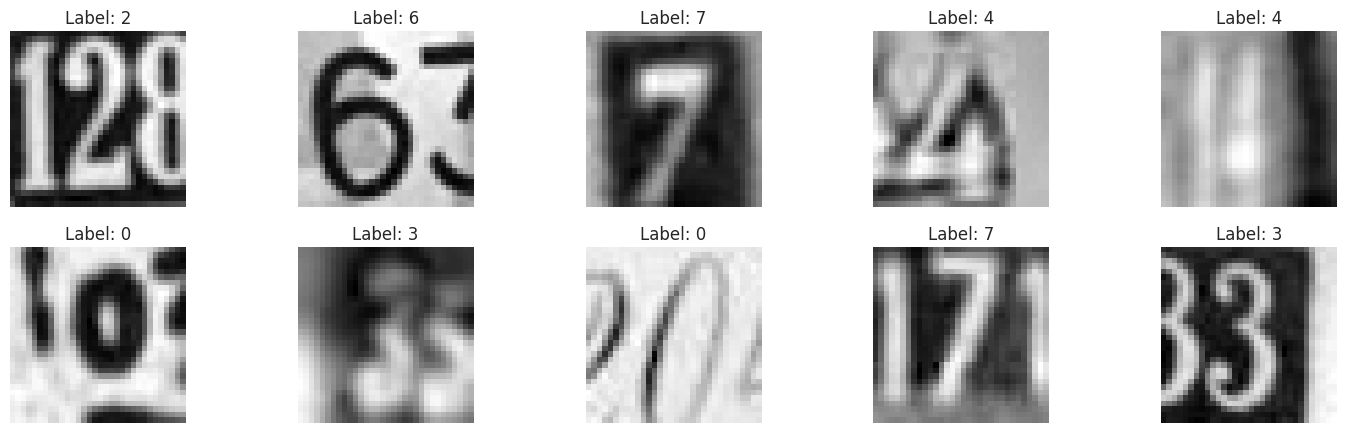

Corresponding labels for the first 10 images: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Since there's an issue with the execution environment, I will provide you with the code that you can run on your local machine
# to visualize the first 10 images in the training data and print their corresponding labels.

import matplotlib.pyplot as plt
import h5py

# Open the file
with h5py.File(file_path, 'r') as h5f:
    # Load the training data and labels
    X_train = h5f['X_train'][:]  # shape (num_samples, height, width, channels)
    y_train = h5f['y_train'][:]  # shape (num_samples, )

# Visualize the first 10 images
plt.figure(figsize=(15, 4.5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # Use squeeze() if the images are grayscale
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print the corresponding labels for the first 10 images
print('Corresponding labels for the first 10 images:', y_train[:10])



**Part 2.2c - Reshape all the images with appropriate shape update the data in same variable.**

Checking the shape of the data

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
y_train.shape

(42000,)

In [ ]:
# Assuming X_train and X_test have been read from the .h5 file and have shapes
# (num_samples, height, width) for grayscale images, or
# (num_samples, height, width, channels) for color images

# Hypothetical desired shape components (you will need to replace these with actual numbers)
desired_height = 32
desired_width = 32
num_channels = 1  # 1 for grayscale, 3 for RGB color images

# Reshape the training and test data to the desired shape
X_train_reshaped = X_train.reshape(-1, desired_height, desired_width, num_channels)
X_test_reshaped = X_test.reshape(-1, desired_height, desired_width, num_channels)

# Update the variables with the reshaped data
X_train = X_train_reshaped
X_test = X_test_reshaped


In [ ]:
X_train.shape

(42000, 32, 32, 1)

In [ ]:
X_test.shape

(18000, 32, 32, 1)

**Part 2.2d - Normalise the images i.e. Normalise the pixel values**

In [ ]:
# #normalize inputs from 0-255 to 0-1
X_train= X_train/255.0
X_test =X_test/255.0
print('Training set',X_train.shape,y_train.shape)
print('Testset',X_test.shape,y_test.shape)

Training set (42000, 32, 32, 1) (42000,)
Testset (18000, 32, 32, 1) (18000,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(18000, 32, 32, 1)
(18000,)


**Part 2.2e - Transform Labels into format acceptable by Neural Network**

In [ ]:
from tensorflow.keras.utils import to_categorical

# Determine the number of unique classes
num_classes = len(np.unique(y_train))

# Transform the labels into a one-hot encoded format
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)


**Part 2.2f - Print total Number of classes in the Dataset.**

In [ ]:
import numpy as np

# Assuming y_train and y_test are loaded with class labels for your dataset
num_classes = len(np.unique(np.concatenate([y_train, y_test])))

print(f"Total number of classes in the dataset: {num_classes}")


Total number of classes in the dataset: 10


**Part 2.3a - Design a Neural Network to train a classifier**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Assuming 'num_classes' is defined as the total number of unique classes in the dataset
# and 'X_train_normalized' is the input feature data already normalized

# Initialize the model
model = Sequential()

# Flatten the input data if it's multidimensional (e.g., for image data)
model.add(Flatten(input_shape=X_train_normalized.shape[1:]))

# Add a Dense layer with ReLU activation
model.add(Dense(128, activation='relu'))

# Optionally, add more Dense layers here if needed, e.g.,
# model.add(Dense(64, activation='relu'))

# Output layer with 'num_classes' units and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               1536      
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2826 (11.04 KB)
Trainable params: 2826 (11.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_complex_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=X_train_normalized.shape[1:]))

    # Tuning the number of dense layers
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    # Tuning the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(
    build_complex_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='hyperband',
    project_name='complex_model_no_early_stopping'
)

tuner.search(X_train_normalized, y_train_categorical,
             epochs=50, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of layers is {best_hps.get('num_layers')}.
""")
for i in range(best_hps.get('num_layers')):
    print(f"- Units in layer {i+1}: {best_hps.get(f'units_{i}')}")
print(f"Optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

